                                          Comentario
0   nivel 80? lo tenia bien guardado el vicio gen...
1                                                HUH
Predicciones:
Comentario: nivel 80? lo tenia bien guardado el vicio genshin, Predicción: Neutral
Comentario: HUH, Predicción: Neutral
Comentario: Que enferma, Predicción: Anger/Rage
Comentario: ENFERMA DE MRDA, Predicción: Anger/Rage
Comentario: ??, Predicción: Neutral
Comentario: HUH, Predicción: Neutral
Comentario: BOOBEST BOOBEST, Predicción: Approval/Empathy
Comentario: ENFERMA ALERT ENFERMA ALERT ENFERMA ALERT ENFERMA ALERT ENFERMA ALERT ENFERMA ALERT ENFERMA ALERT ENFERMA ALERT ENFERMA ALERT ENFERMA ALERT ENFERMA ALERT ENFERMA ALERT ENFERMA ALERT ENFERMA ALERT ENFERMA ALERT ENFERMA ALERT .., Predicción: Anger/Rage
Comentario: ES MENOOOR, Predicción: Disapproval
Comentario: ENFERMITA, Predicción: Anger/Rage
Comentario: queeeee??, Predicción: Neutral
Comentario: ENFERMA ALERT ENFERMA ALERT ENFERMA ALERT ENFERMA ALERT ENFERMA 

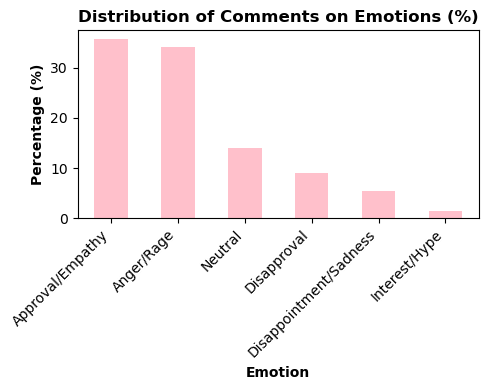

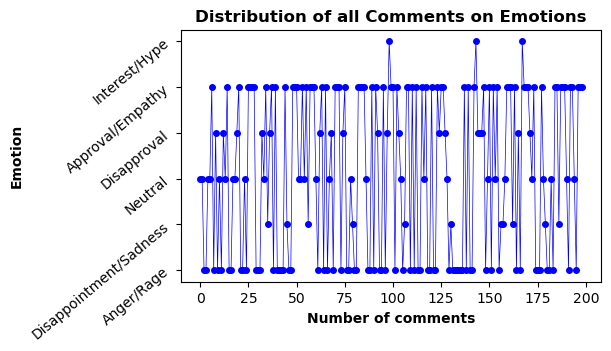

Comentarios: hfoaldld
The predicted class for the phrase is: ['Aprob./Empatía/Conf.']
The predicted class for the phrase is: ['Aprob./Empatía/Conf.']
['Aprob./Empatía/Conf.']
Comentarios: hfoaldld
The predicted class for the phrase is: ['Aprob./Empatía/Conf.']
The predicted class for the phrase is: ['Aprob./Empatía/Conf.']
['Aprob./Empatía/Conf.']


In [1]:
#INTERFAZ PARA EMOCIONES Y SENTIMIENTOS


import tkinter as tk
from tkinter import ttk
from tkinter import Label
from tkinter import filedialog  # Importar filedialog desde tkinter
from tkinter import PhotoImage
from PIL import Image, ImageTk # Importamos Pillow para redimensionar
import pandas as pd
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
from tensorflow.keras.preprocessing.text import Tokenizer
#from keras.preprocessing.text import Tokenizer
import pickle  # Importar la biblioteca pickle
#from keras.utils import pad_sequences
from keras_preprocessing.sequence import pad_sequences
from keras.models import Model
import tensorflow as tf
from tensorflow.keras.models import load_model
import nltk
from nltk.tokenize import word_tokenize
import string
from tensorflow.keras.preprocessing.text import text_to_word_sequence
#from keras.utils import pad_sequences
from keras_preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt

from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from collections import Counter
from tkinter import messagebox
import os
os.environ["TOKENIZERS_PARALLELISM"]="false"

# Variable global para almacenar el DataFrame
comments_df = None
results_df = None
comments_df_sentiment = None
results_df_sentiment = None


#--------------------------------------FUNCIONES DE ARRIBA--------------------------------------------

def ejecutar_algoritmo(input_texts):
    # Cargar el modelo pre-entrenado y el tokenizador
    model_path = r"./modelo_entrenado_twitch/model_robertuito_emociones"
    tokenizer_path = r"./modelo_entrenado_twitch/tok_robertuito_emociones"

    model = AutoModelForSequenceClassification.from_pretrained(model_path)
    tokenizer = AutoTokenizer.from_pretrained(tokenizer_path)
    
    # Tokenización de los datos
    inputs = tokenizer(input_texts, padding=True, truncation=True, return_tensors="pt")
    
    # Pasar los tokens a través del modelo
    with torch.no_grad():
        outputs = model(**inputs)

    # Procesar las predicciones
    logits = outputs.logits
    probabilities = torch.nn.functional.softmax(logits, dim=-1)
    predicted_labels = torch.argmax(probabilities, dim=-1)
    
    # Convertir las predicciones a una lista de Python
    predicted_labels_list = predicted_labels.cpu().numpy().tolist()
    
    # Mapear las etiquetas predichas a sus correspondientes etiquetas de texto
    id2label = {0: "Decepción/Tristeza", 1: "Aprob./Empatía/Conf.", 2: "Enfado/Ira",
                    3: "Interés/Anticip./Hype", 4: "Desaprobación", 5: "Indeterminado"}
    
    predicted_labels_text = [id2label[label_id] for label_id in predicted_labels_list]
    #print("Predicciones:", predicted_labels_text)
    print("The predicted class for the phrase is:", predicted_labels_text)
    resultado = predicted_labels_text
    return resultado

def ejecutar_algoritmo_sentiment(input_texts_sentiment):
    # Cargar el modelo pre-entrenado y el tokenizador
    model_path = r"./modelo_entrenado_twitch/model_robertuito_polaridad"
    tokenizer_path = r"./modelo_entrenado_twitch/tok_robertuito_polaridad"

    model = AutoModelForSequenceClassification.from_pretrained(model_path)
    tokenizer = AutoTokenizer.from_pretrained(tokenizer_path)
    
    # Tokenización de los datos
    inputs = tokenizer(input_texts_sentiment, padding=True, truncation=True, return_tensors="pt")
    
    # Pasar los tokens a través del modelo
    with torch.no_grad():
        outputs = model(**inputs)

    # Procesar las predicciones
    logits = outputs.logits
    probabilities = torch.nn.functional.softmax(logits, dim=-1)
    predicted_labels = torch.argmax(probabilities, dim=-1)
    
    # Convertir las predicciones a una lista de Python
    predicted_labels_list = predicted_labels.cpu().numpy().tolist()
    
    # Mapear las etiquetas predichas a sus correspondientes etiquetas de texto
    id2label = {0: "Negative", 1: "Neutral", 2: "Positive"}
    
    predicted_labels_text = [id2label[label_id] for label_id in predicted_labels_list]
    #print("Predicciones:", predicted_labels_text)
    print("The predicted class for the phrase is:", predicted_labels_text)
    resultado_sentiment = predicted_labels_text
    return resultado_sentiment

def boton_algoritmo():
    global resultado
    input_texts = cuadro_texto_frame1.get()
    print("Comentarios:", input_texts)
    ejecutar_algoritmo(input_texts)
    resultado = ejecutar_algoritmo(input_texts)
    print(resultado)
    resultado_strvar.set(resultado)
    cuadro_prediccion_resultado = ttk.Entry(frame1,textvariable=resultado_strvar,width=30,state="disabled")  
    cuadro_prediccion_resultado.pack()
    cuadro_prediccion_resultado.place(x=550, y=60)

def boton_algoritmo_sentiment():
    global resultado_sentiment
    input_texts_sentiment = cuadro_texto_frame2.get()
    print("Comentarios:", input_texts_sentiment)
    ejecutar_algoritmo_sentiment(input_texts_sentiment)
    resultado_sentiment = ejecutar_algoritmo_sentiment(input_texts_sentiment)
    print(resultado_sentiment)
    resultado_sentiment_strvar.set(resultado_sentiment)
    cuadro_prediccion_resultado_sentiment = ttk.Entry(frame2,textvariable=resultado_sentiment_strvar,width=30,state="disabled")  
    cuadro_prediccion_resultado_sentiment.pack()
    cuadro_prediccion_resultado_sentiment.place(x=550, y=60)

#---------------------------------------------------------FUNCIONES DE ABAJO-------------------------------------------------------
def mostrar_informacion():
    messagebox.showinfo("IMPORTANT: The file must contain in the first column the following comments")

def cargar_archivo():
    global comments_df 
    global ruta_archivo
    maxlen=100000000000
    # Abrir un cuadro de diálogo para seleccionar el archivo
    ruta_archivo = filedialog.askopenfilename(filetypes=[("Libro de Excel", "*.xlsx"),("Libro de Excel 97- 2004", "*.xls"),("Archivo CSV", "*.csv")])
    
    # Leer el archivo seleccionado 
    if ruta_archivo:
        try:
            # Determinar el tipo de archivo basado en la extensión
            if ruta_archivo.endswith('.xls') or ruta_archivo.endswith('.xlsx'):
                # Cargar el archivo Excel
                comments_df = pd.read_excel(ruta_archivo, usecols=[0], names=["Comentario"], engine='openpyxl')
                #para que me muestre el mensaje temporal 
                mostrar_mensaje()

            elif ruta_archivo.endswith('.csv'):
                # Cargar el archivo CSV
                comments_df = pd.read_csv(ruta_archivo, delimiter=';', usecols=[0], header=None, skiprows=1, names=["Comentario"], encoding="latin1")
                #para que me muestre el mensaje temporal 
                mostrar_mensaje()
            else:
                # Mostrar un mensaje de error si el archivo no es compatible
                #print("Error: El archivo seleccionado no es un archivo Excel ni un archivo CSV.")
                print("Error: The selected file is not an Excel workbook or a CSV file.")
                return

            comments_df.drop(comments_df.head(0).index,inplace = True)
            print(comments_df.head(2))  # Muestra las primeras filas del DataFrame
            #habilitar el boton de ejecutar el algoritmo
            #boton_ejecut_csv = ttk.Button(ventana, text="Ejecutar algoritmo para excel/csv", command=ejecutar_excel,padding=(10, 10),style='ColorBoton.TButton',state="normal")
            boton_ejecut_csv = ttk.Button(frame1, text="Run Algorithm with Csv/Excel", command=ejecutar_excel,padding=(10, 10),style='ColorBoton.TButton',state="normal")
            #boton_ejecut_csv.pack(pady=0) #indica el espacio que habra entre este boton y el siguiente 
            boton_ejecut_csv.place(x=550, y=150)
        
        except Exception as e:
            # Manejar cualquier error que pueda ocurrir al cargar el archivo
            #print("Error al cargar el archivo:", e)
            print("Error uploading file:", e)
        
    return comments_df 

def cargar_archivo_sentiment():
    global comments_df_sentiment
    global ruta_archivo_sentiment
    maxlen=100000000000
    # Abrir un cuadro de diálogo para seleccionar el archivo
    ruta_archivo_sentiment = filedialog.askopenfilename(filetypes=[("Libro de Excel", "*.xlsx"),("Libro de Excel 97- 2004", "*.xls"),("Archivo CSV", "*.csv")])
    
    # Leer el archivo seleccionado 
    if ruta_archivo_sentiment:
        try:
            # Determinar el tipo de archivo basado en la extensión
            if ruta_archivo_sentiment.endswith('.xls') or ruta_archivo_sentiment.endswith('.xlsx'):
                # Cargar el archivo Excel
                comments_df_sentiment = pd.read_excel(ruta_archivo_sentiment, usecols=[0], names=["Comentario"], engine='openpyxl')
                #para que me muestre el mensaje temporal 
                mostrar_mensaje()

            elif ruta_archivo_sentiment.endswith('.csv'):
                # Cargar el archivo CSV
                comments_df_sentiment = pd.read_csv(ruta_archivo_sentiment, delimiter=';', usecols=[0], header=None, skiprows=1, names=["Comentario"], encoding="latin1")
                #para que me muestre el mensaje temporal 
                mostrar_mensaje()
            else:
                # Mostrar un mensaje de error si el archivo no es compatible
                #print("Error: El archivo seleccionado no es un archivo Excel ni un archivo CSV.")
                print("Error: The selected file is not an Excel workbook or a CSV file.")
                return

            comments_df_sentiment.drop(comments_df_sentiment.head(0).index,inplace = True)
            print(comments_df_sentiment.head(2))  # Muestra las primeras filas del DataFrame
            #habilitar el boton de ejecutar el algoritmo
            #boton_ejecut_csv = ttk.Button(ventana, text="Ejecutar algoritmo para excel/csv", command=ejecutar_excel,padding=(10, 10),style='ColorBoton.TButton',state="normal")
            boton_ejecut_csv_sentiment = ttk.Button(frame2, text="Run Algorithm with Csv/Excel", command=ejecutar_excel_sentiment,padding=(10, 10),style='ColorBoton.TButton',state="normal")
            #boton_ejecut_csv.pack(pady=0) #indica el espacio que habra entre este boton y el siguiente 
            boton_ejecut_csv_sentiment.place(x=550, y=150)
        
        except Exception as e:
            # Manejar cualquier error que pueda ocurrir al cargar el archivo
            #print("Error al cargar el archivo:", e)
            print("Error uploading file:", e)
        
    return comments_df_sentiment

def ejecutar_excel():
    global comments_df 
    global ruta_archivo
    global results_df
    
    if comments_df is not None:

       # Cargar el modelo pre-entrenado y el tokenizador
        model_path = r"./modelo_entrenado_twitch/model_robertuito_emociones"
        tokenizer_path = r"./modelo_entrenado_twitch/tok_robertuito_emociones"
        
        model = AutoModelForSequenceClassification.from_pretrained(model_path)
        tokenizer = AutoTokenizer.from_pretrained(tokenizer_path)

        # Obtener los comentarios como una lista
        #input_texts = comments_df["Comentario"].tolist()
        input_texts = comments_df["Comentario"].tolist()
        
        # Tokenización de los datos
        inputs = tokenizer(input_texts, padding=True, truncation=True, return_tensors="pt")
        
        # Pasar los tokens a través del modelo
        with torch.no_grad():
            outputs = model(**inputs)
        
        # Procesar las predicciones
        logits = outputs.logits
        probabilities = torch.nn.functional.softmax(logits, dim=-1)
        predicted_labels = torch.argmax(probabilities, dim=-1)
        
        # Convertir las predicciones a una lista de Python
        predicted_labels_list = predicted_labels.cpu().numpy().tolist()
        
        # Mapear las etiquetas predichas a sus correspondientes etiquetas de texto
        id2label = {0: "Disappointment/Sadness", 1: "Approval/Empathy", 2: "Anger/Rage",
                    3: "Interest/Hype", 4: "Disapproval", 5: "Neutral"}
        
        predicted_labels_text = [id2label[label_id] for label_id in predicted_labels_list]
        
        # Mostrar las predicciones al usuario
        print("Predicciones:")
        for text, label in zip(input_texts, predicted_labels_text):
            print(f"Comentario: {text.strip()}, Predicción: {label}")

        # Crear un DataFrame de pandas con los comentarios, las predicciones y las etiquetas originales (si están disponibles en el archivo CSV)
        results_df = pd.DataFrame({'Comentario': input_texts, 'Prediction': predicted_labels_text})
        print(results_df.head(3))

        # Mostrar las gráficas
        mostrar_grafica1(results_df)
        mostrar_grafica2(results_df)

        #habilitar el boton de descargar 
        #boton_descargar_csv_habilitado = ttk.Button(ventana, text="Descargar Excel/csv", command=descargar_excel,padding=(43, 10),style='ColorBoton.TButton',state="normal")
        boton_descargar_csv_habilitado = ttk.Button(frame1, text="Download Excel/CSV", command=descargar_excel,padding=(43, 10),style='ColorBoton.TButton',state="normal")
        boton_descargar_csv_habilitado.pack(pady=0) #indica el espacio que habra entre este boton y el siguiente 
        boton_descargar_csv_habilitado.place(x=1100, y=150)
        
        return results_df
    
def ejecutar_excel_sentiment():
    global comments_df_sentiment
    global ruta_archivo_sentiment
    global results_df_sentiment
    
    if comments_df_sentiment is not None:

       # Cargar el modelo pre-entrenado y el tokenizador
        model_path = r"./modelo_entrenado_twitch/model_robertuito_polaridad"
        tokenizer_path = r"./modelo_entrenado_twitch/tok_robertuito_polaridad"
        
        model = AutoModelForSequenceClassification.from_pretrained(model_path)
        tokenizer = AutoTokenizer.from_pretrained(tokenizer_path)

        # Obtener los comentarios como una lista
        #input_texts = comments_df["Comentario"].tolist()
        input_texts_sentiment = comments_df["Comentario"].tolist()
        
        # Tokenización de los datos
        inputs = tokenizer(input_texts_sentiment, padding=True, truncation=True, return_tensors="pt")
        
        # Pasar los tokens a través del modelo
        with torch.no_grad():
            outputs = model(**inputs)
        
        # Procesar las predicciones
        logits = outputs.logits
        probabilities = torch.nn.functional.softmax(logits, dim=-1)
        predicted_labels = torch.argmax(probabilities, dim=-1)
        
        # Convertir las predicciones a una lista de Python
        predicted_labels_list = predicted_labels.cpu().numpy().tolist()
        
        # Mapear las etiquetas predichas a sus correspondientes etiquetas de texto
        id2label = {0: "Negative", 1: "Neutral", 2: "Positive"}
        
        predicted_labels_text = [id2label[label_id] for label_id in predicted_labels_list]
        
        # Mostrar las predicciones al usuario
        print("Predicciones:")
        for text, label in zip(input_texts_sentiment, predicted_labels_text):
            print(f"Comentario: {text.strip()}, Predicción: {label}")

        # Crear un DataFrame de pandas con los comentarios, las predicciones y las etiquetas originales (si están disponibles en el archivo CSV)
        results_df_sentiment = pd.DataFrame({'Comentario': input_texts_sentiment, 'Prediction': predicted_labels_text})
        print(results_df_sentiment.head(3))

        # Mostrar las gráficas
        mostrar_grafica3(results_df_sentiment)
        mostrar_grafica4(results_df_sentiment)

        #habilitar el boton de descargar 
        #boton_descargar_csv_habilitado = ttk.Button(ventana, text="Descargar Excel/csv", command=descargar_excel,padding=(43, 10),style='ColorBoton.TButton',state="normal")
        boton_descargar_csv_habilitado_sentiment = ttk.Button(frame2, text="Download Excel/CSV", command=descargar_excel_sentiment,padding=(43, 10),style='ColorBoton.TButton',state="normal")
        #boton_descargar_csv_habilitado_sentiment.pack(pady=0) #indica el espacio que habra entre este boton y el siguiente 
        boton_descargar_csv_habilitado_sentiment.place(x=1100, y=150)
        
        return results_df

def descargar_excel():
    global results_df
    
    # Abrir un cuadro de diálogo para seleccionar la ubicación y el nombre del archivo
    file_path = filedialog.asksaveasfilename(defaultextension=".xlsx", filetypes=[("Libro de Excel", "*.xlsx"), ("Fichero CSV", "*.csv")])
    
    # Verificar si el usuario canceló la operación
    if file_path:
        try:
        # Obtener la extensión del archivo seleccionado
        #file_extension = os.path.splitext(file_path)[1].lower()
        
            # Guardar el DataFrame en un archivo según la extensión seleccionada
            if  file_path.endswith('.xlsx'): #== '.xlsx':
                results_df.to_excel(file_path, index=False)
                
            elif file_path.endswith('.csv'): #== '.csv':
                results_df.to_csv(file_path, index=False)
            else:
                # Mostrar un mensaje de error si el archivo no es compatible
                #print("Error: El archivo seleccionado no es un archivo Excel ni un archivo CSV.")
                print("Error: The selected file is not an Excel workbook or a CSV file.")
                return
        except Exception as e:
            # Manejar cualquier error que pueda ocurrir al cargar el archivo
            #print("Error al descargar el fichero:", e)
            print("Error uploading file:", e)

def descargar_excel_sentiment():
    global results_df_sentiment
    
    # Abrir un cuadro de diálogo para seleccionar la ubicación y el nombre del archivo
    file_path_sentiment = filedialog.asksaveasfilename(defaultextension=".xlsx", filetypes=[("Libro de Excel", "*.xlsx"), ("Fichero CSV", "*.csv")])
    
    # Verificar si el usuario canceló la operación
    if file_path:
        try:
        # Obtener la extensión del archivo seleccionado
        #file_extension = os.path.splitext(file_path)[1].lower()
        
            # Guardar el DataFrame en un archivo según la extensión seleccionada
            if  file_path_sentiment.endswith('.xlsx'): #== '.xlsx':
                results_df_sentiment.to_excel(file_path, index=False)
                
            elif file_path_sentiment.endswith('.csv'): #== '.csv':
                results_df_sentiment.to_csv(file_path, index=False)
            else:
                # Mostrar un mensaje de error si el archivo no es compatible
                #print("Error: El archivo seleccionado no es un archivo Excel ni un archivo CSV.")
                print("Error: The selected file is not an Excel workbook or a CSV file.")
                return
        except Exception as e:
            # Manejar cualquier error que pueda ocurrir al cargar el archivo
            #print("Error al descargar el fichero:", e)
            print("Error uploading file:", e)

#--------------CREO que tiene que ir antes de cargar_archivo por flujo de codigo
def mostrar_mensaje():
    #label.config(text="Fichero cargado exitosamente")
    label.config(text="File uploaded successfully")
    #label.place(x=50, y=200) 
    frame1.after(2000, borrar_mensaje)  # 5000 milisegundos = 5 segundos
    frame2.after(2000, borrar_mensaje)  # 5000 milisegundos = 5 segundos
    #ventana.after(2000, borrar_mensaje)  # 5000 milisegundos = 5 segundos

def borrar_mensaje():
    label.config(text="")
#-------------------------------------------------------------------------

def mostrar_grafica1(results_df):
    # Obtener conteo de valores únicos en la columna "Predicted"
    class_counts = results_df['Prediction'].value_counts()

    # Calcular el porcentaje de cada clase
    total_samples = len(results_df)
    class_percentages = (class_counts / total_samples) * 100

    # Crear la gráfica de barras
    plt.figure(figsize=(5,4))
    class_percentages.plot(kind='bar', color='pink')
    plt.title('Distribution of Comments on Emotions (%)',fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Emotion',fontweight='bold')
    plt.ylabel('Percentage (%)',fontweight='bold')
    plt.tight_layout()

    # Mostrar la gráfica en el frame1
    canvas = FigureCanvasTkAgg(plt.gcf(), master=frame1)
    canvas.draw()
    canvas.get_tk_widget().place(x=50, y=220)

def mostrar_grafica2(results_df):
    # Definir el diccionario de mapeo de clases a valores    
    clase_valor = {
        'Interest/Hype': 6,
        'Approval/Empathy': 4,
        'Disapproval': 2,
        'Neutral': 0,
        'Disappointment/Sadness': -2,
        'Anger/Rage': -4
    }
    
    # Crear una lista para almacenar las coordenadas x e y de cada punto
    coordenadas_x = []
    coordenadas_y = []

    for _, row in results_df.iterrows():
        clase = row['Prediction']
        valor = clase_valor.get(clase, 0)
        coordenadas_y.append(valor)
        coordenadas_x.append(_)

    plt.figure(figsize=(7, 4))
    plt.plot(coordenadas_x, coordenadas_y, marker='o', color='blue', linewidth=0.5, markersize=4)

    # Configurar las etiquetas del eje y (UNA SOLA VEZ)
    plt.yticks(list(clase_valor.values()), list(clase_valor.keys()))

    plt.title('Distribution of all Comments on Emotions', fontweight='bold')
    plt.xlabel('Number of comments', fontweight='bold')
    plt.ylabel('Emotion', fontweight='bold')
    plt.subplots_adjust(left=0.3)
    plt.subplots_adjust(bottom=0.25)
    plt.yticks(rotation=40)

    canvas = FigureCanvasTkAgg(plt.gcf(), master=frame1)
    canvas.draw()
    canvas.get_tk_widget().place(x=600, y=220)

    plt.show()
def mostrar_grafica3(results_df_sentiment):
    # Obtener conteo de valores únicos en la columna "Predicted"
    class_counts = results_df_sentiment['Prediction'].value_counts()

    # Calcular el porcentaje de cada clase
    total_samples = len(results_df_sentiment)
    class_percentages = (class_counts / total_samples) * 100

    # Crear la gráfica de barras
    plt.figure(figsize=(5,4))
    class_percentages.plot(kind='bar', color='pink')
    plt.title('Distribution of Comments on Polarity (%)',fontweight='bold')
    plt.xlabel('Polarity',fontweight='bold')
    plt.ylabel('Percentage (%)',fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    # Mostrar la gráfica en el frame2
    canvas = FigureCanvasTkAgg(plt.gcf(), master=frame2)
    canvas.draw()
    canvas.get_tk_widget().place(x=50, y=220)


def mostrar_grafica4(results_df_sentiment):
    # Definir el diccionario de mapeo de clases a valores    
    clase_valor = {
        'Positive': 2,
        'Neutral': 0,
        'Negative': -2,
    }
    
    # Crear una lista para almacenar las coordenadas x e y de cada punto
    coordenadas_x = []
    coordenadas_y = []
    etiquetas_y = []  # Lista para almacenar los textos asociados a cada valor en el eje y
    
    for _, row in results_df_sentiment.iterrows():
        clase = row['Prediction']
        valor = clase_valor.get(clase, 0)
        coordenadas_y.append(valor)
        coordenadas_x.append(_)

    plt.figure(figsize=(7, 4))
    plt.plot(coordenadas_x, coordenadas_y, marker='o', color='blue', linewidth=0.5, markersize=4)

    # Configurar las etiquetas del eje y (UNA SOLA VEZ)
    plt.yticks(list(clase_valor.values()), list(clase_valor.keys()))

    plt.xlabel('Number of comments', fontweight='bold')
    plt.ylabel('Sentiment', fontweight='bold')
    plt.title('Distribution of all Comments on Polarity', fontweight='bold')
    plt.subplots_adjust(left=0.3)
    plt.subplots_adjust(bottom=0.25)
    plt.yticks(rotation=40)

    canvas = FigureCanvasTkAgg(plt.gcf(), master=frame2)
    canvas.draw()
    canvas.get_tk_widget().place(x=600, y=220)

    plt.show()
#---------------------------------------------------FIN FUNCIONES-------------------------------------

#---------------------------LINEA SEPARADORA ------------------------
#Creo que tiene que ir aqui
def draw_separator(canvas):
    # Dibuja una línea continua horizontal en el centro del canvas
    canvas.create_line(30, 100, 1320, 100, fill="darkblue", width=2)
    #canvas.create_line(x1,y1,x2,y2)

#------------------INTERFAZ----------------#
# Crear una instancia de la ventana principal
ventana = tk.Tk()

# Obtener las dimensiones de la pantalla
screen_width = ventana.winfo_screenwidth()
screen_height = ventana.winfo_screenheight()

ventana.title("Emotional Response for Twich and Video Games")
ventana.configure(background='#7c1324')

resultado_strvar = tk.StringVar()
resultado_sentiment_strvar = tk.StringVar()

#para que no se pueda cambiar las dimensiones de la ventana
#hay que ponerlo delante del geometry()
ventana.resizable(width=True, height=True)

# Establecer las dimensiones de la ventana
ventana.geometry(f"{screen_width}x{screen_height}")

# Crear un objeto Style
estilo = ttk.Style()
# Configurar el color de fondo de las pestañas
estilo.configure("Fondo.TFrame", background="lightblue")

# Crear un widget Notebook (pestañas)
pestanas = ttk.Notebook(ventana)

# Crear el contenido de cada pestaña
frame1 = ttk.Frame(pestanas)
frame2 = ttk.Frame(pestanas)

# Agregar contenido a cada pestaña
pestanas.add(frame1, text="Emotions")
pestanas.add(frame2, text="Polarity")

# Empaquetar el Notebook
pestanas.pack(expand=1, fill="both")

# Configurar el color de fondo de las pestañas
estilo.configure("TNotebook.Tab", highlightbackground='ADD8E6')

# Crear un estilo personalizado para el botón
estilo = ttk.Style()
estilo.configure('ColorBoton.TButton', background='#ADD8E6')  # Cambiar el color de fondo del botón

#-----------------Crear un BOTON DE INFORMACION
boton_informacion = ttk.Button(ventana, text="Info", command=mostrar_informacion)
boton_informacion.pack(pady=10)
boton_informacion.place(x=310, y=195)

#------------------------Crear el canvas para la LINEA DIVISORIA 
canvas1 = tk.Canvas(frame1, width=2200, height=800)
canvas1.pack()
canvas2 = tk.Canvas(frame2, width=2200, height=800)
canvas2.pack()
# Dibujar la línea de separación
draw_separator(canvas1)
draw_separator(canvas2)

try:
    imagen = Image.open('./Logo3VideoGames.jpeg')
    #imagen = Image.open(relative_path)
    imagen = imagen.resize((180, 180), resample=Image.BICUBIC)
    foto = ImageTk.PhotoImage(imagen)
    # Crear un label para mostrar la imagen
    label_imagen1 = tk.Label(frame1, image=foto, width=180, height=180)
    label_imagen1.place(x=1325, y=600)
    label_imagen2 = tk.Label(frame2, image=foto, width=180, height=180)
    label_imagen2.place(x=1325, y=600)
except FileNotFoundError:
    print("Error: Image not found")
    exit()
#---------------------------------PARTE DE ARRIBA (Emociones --> frame1) -----------------------------

titulo_frame1 = ttk.Label(frame1, text="Insert a comment:")
titulo_frame1.place(x=50, y=40)
cuadro_texto_frame1 = ttk.Entry(frame1, width=30)
cuadro_texto_frame1.place(x=50, y=60)

titulo_prediccion_frame1 = ttk.Label(frame1, text="Comment prediction:")
titulo_prediccion_frame1.place(x=550, y=40)
cuadro_prediccion_frame1 = ttk.Entry(frame1, width=30, state="disabled")  
cuadro_prediccion_frame1.place(x=550, y=60)

boton_algoritmo_frame1 = ttk.Button(frame1, text="Run Algorithm", command=boton_algoritmo, padding=(43, 10))
boton_algoritmo_frame1.place(x=1100, y=40)

#----------------------------------------------PARTE DE ABAJO (Emociones) -----------------------------

botoncsv_frame1 = ttk.Button(frame1, text="Insert csv/Excel", command=cargar_archivo, padding=(40, 10), style='ColorBoton.TButton')
#botoncsv_frame1.pack(pady=0)
botoncsv_frame1.place(x=50, y=150)

# botón
boton_ejecut_csv_frame1 = ttk.Button(frame1, text="Run Algorithm with Csv/Excel", command=ejecutar_excel, padding=(10, 10), style='ColorBoton.TButton', state="disabled")
#boton_ejecut_csv_frame1.pack(pady=0) #indica el espacio que habra entre este boton y el siguiente 
boton_ejecut_csv_frame1.place(x=550, y=150)

boton_descargar_csv_frame1 = ttk.Button(frame1, text="Download Excel/CSV", command=descargar_excel, padding=(43, 10), style='ColorBoton.TButton', state="disabled")
#boton_descargar_csv_frame1.pack(pady=0)
boton_descargar_csv_frame1.place(x=1100, y=150)

#---------------------------------PARTE DE ARRIBA (Polaridad --> frame2) -----------------------------

titulo_frame2 = ttk.Label(frame2, text="Insert a comment:")
titulo_frame2.place(x=50, y=40)
cuadro_texto_frame2 = ttk.Entry(frame2, width=30)
cuadro_texto_frame2.place(x=50, y=60)

titulo_prediccion_frame2 = ttk.Label(frame2, text="Comment prediction:")
titulo_prediccion_frame2.place(x=550, y=40)
cuadro_prediccion_frame2 = ttk.Entry(frame2, width=30, state="disabled")  
cuadro_prediccion_frame2.place(x=550, y=60)

boton_algoritmo_frame2 = ttk.Button(frame2, text="Run Algorithm", command=boton_algoritmo_sentiment, padding=(43, 10))
boton_algoritmo_frame2.place(x=1100, y=40)

#----------------------------------------------PARTE DE ABAJO (Polaridad) -----------------------------

botoncsv_frame2 = ttk.Button(frame2, text="Insert csv/Excel", command=cargar_archivo_sentiment, padding=(40, 10), style='ColorBoton.TButton')
#botoncsv_frame2.pack(pady=0)
botoncsv_frame2.place(x=50, y=150)

# botón
boton_ejecut_csv_frame2 = ttk.Button(frame2, text="Run Algorithm with Csv/Excel", command=ejecutar_excel_sentiment, padding=(10, 10), style='ColorBoton.TButton', state="disabled")
#boton_ejecut_csv_frame2.pack(pady=0) #indica el espacio que habra entre este boton y el siguiente 
boton_ejecut_csv_frame2.place(x=550, y=150)

boton_descargar_csv_frame2 = ttk.Button(frame2, text="Download Excel/CSV", command=descargar_excel_sentiment, padding=(43, 10), style='ColorBoton.TButton', state="disabled")
#boton_descargar_csv_frame2.pack(pady=0)
boton_descargar_csv_frame2.place(x=1100, y=150)
#-------------------------------------------------------------------------------------------
#etiqueta para mostrar los mesnajes temporales
label = tk.Label(frame1, text="")
#label_frame1.pack(pady=0)
label= tk.Label(frame2, text="")
#label_frame2.pack(pady=0)

# Empaquetar el widget Notebook en la ventana principal
#pestanas.pack(expand=True, fill="both")
#-------------------------------------------------FIN INTERFAZ------------------------------------------------------

# Empaquetar el widget Notebook en la ventana principal
#pestanas.pack(expand=True, fill="both")

# Iniciar el bucle de eventos
ventana.mainloop()